exp 1 ( multiple linear regression )

Mean Squared Error (MSE): 0.8373
R2 Score: 0.9949


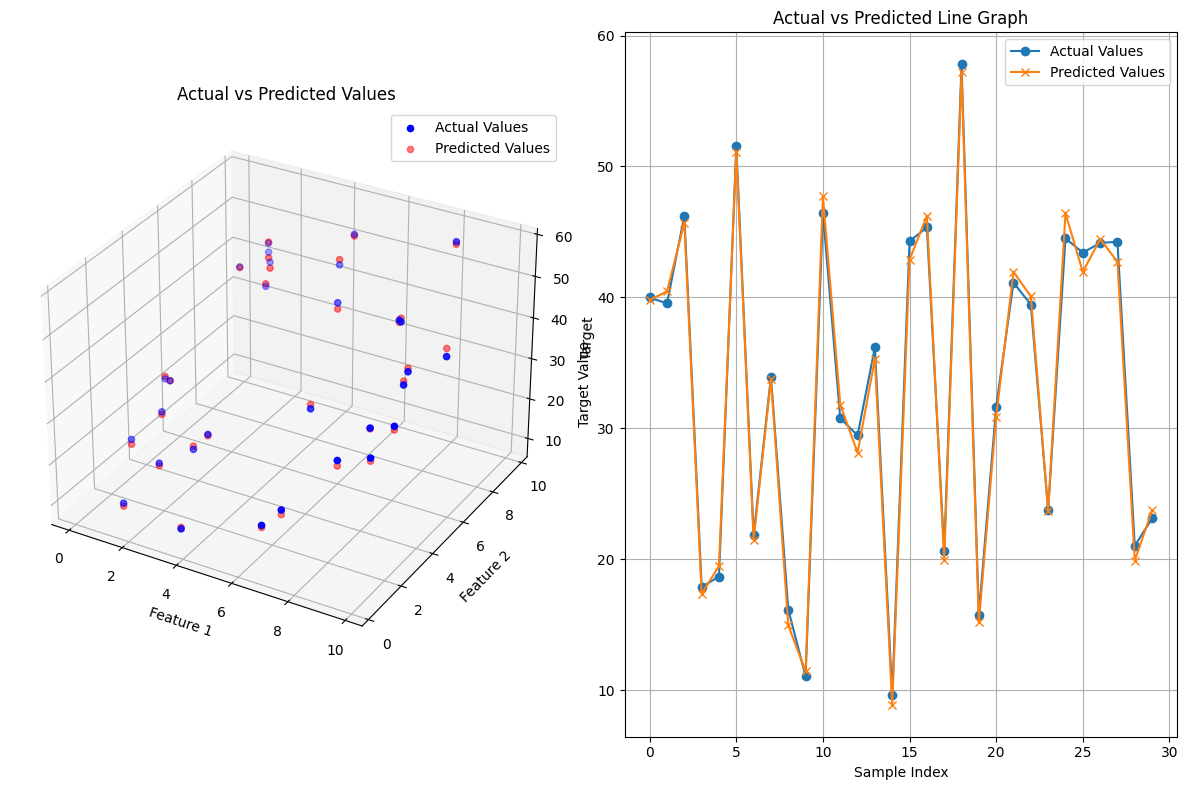

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic dataset
np.random.seed(42)
n_samples = 100
X1 = np.random.rand(n_samples) * 10  # Feature 1
X2 = np.random.rand(n_samples) * 10  # Feature 2
# Target variable with some noise
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(n_samples)

# Create a DataFrame
data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})

# Split the dataset into features and target variable
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Visualize the results (3D scatter plot)
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the actual vs predicted values
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')

# Scatter plot of the actual values
ax.scatter(X_test['Feature1'], X_test['Feature2'], y_test, color='blue', label='Actual Values')

# Scatter plot of the predicted values
ax.scatter(X_test['Feature1'], X_test['Feature2'], y_pred, color='red', label='Predicted Values', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# Create a line graph of predictions vs actual values
plt.subplot(122)
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Line Graph')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



EXP 2 ( LOGISTIC REGRESSION)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


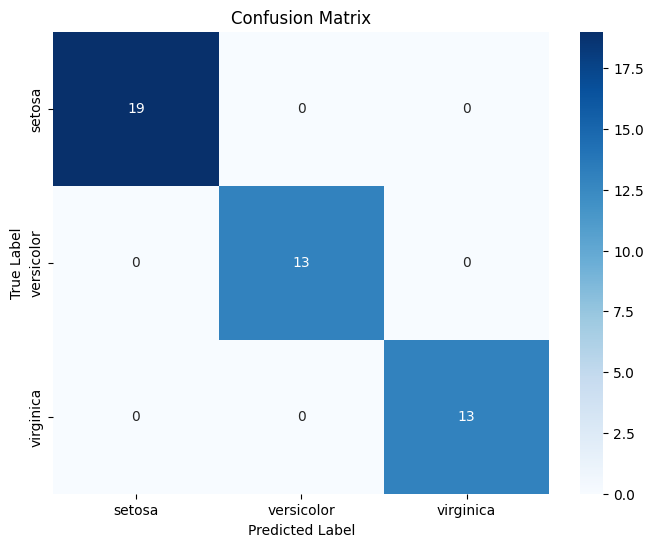

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increased max_iter for convergence

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate and display the confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Optionally: visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



EXP 3 cart
1) classification

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



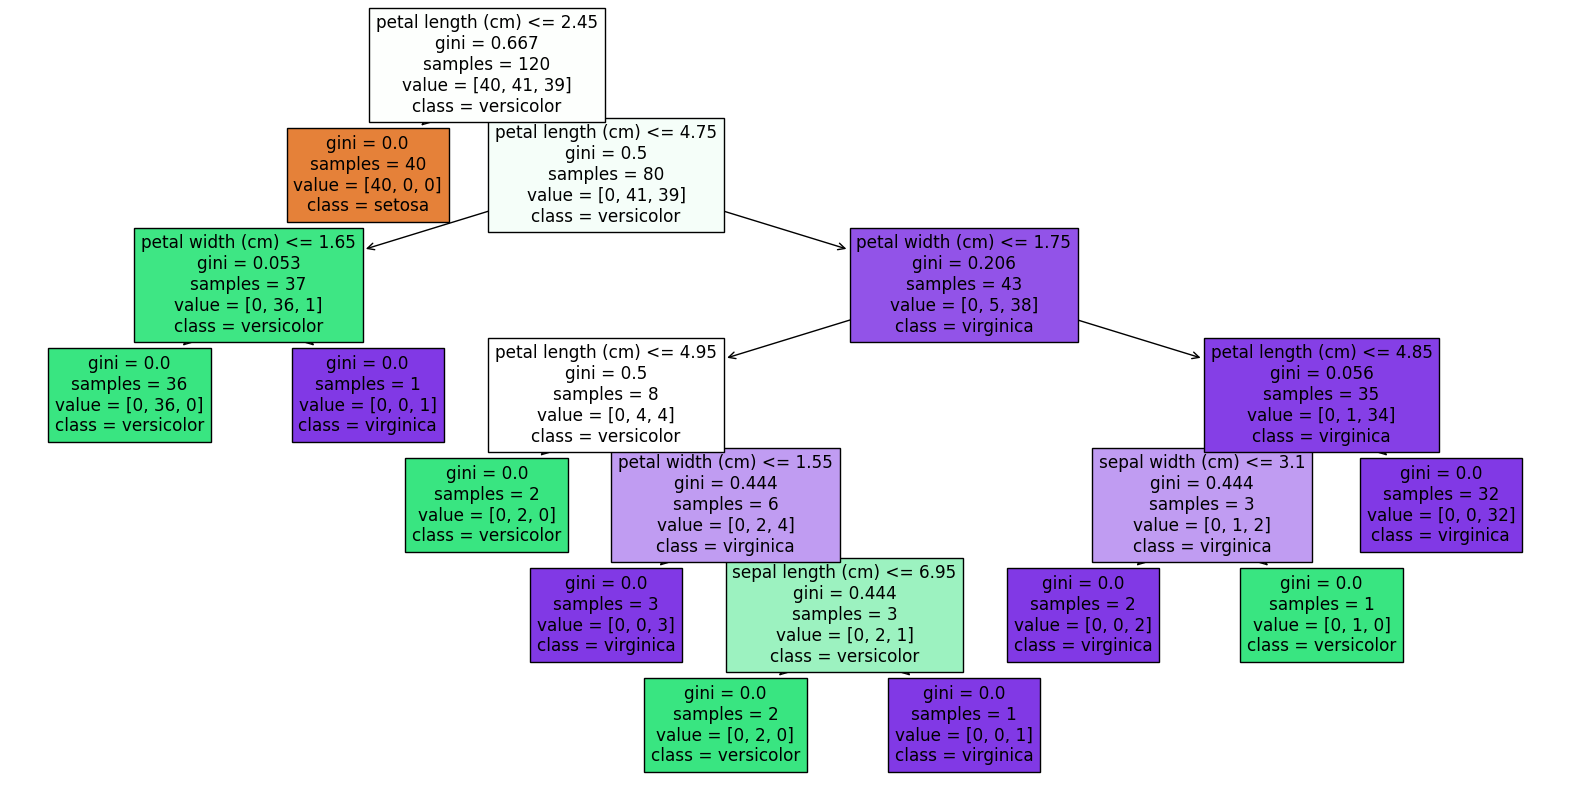

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train the classifier on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Display the classification report
target_names = iris.target_names
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


2.) cart regression

Mean Squared Error (MSE): 0.0143
R2 Score: 0.9690


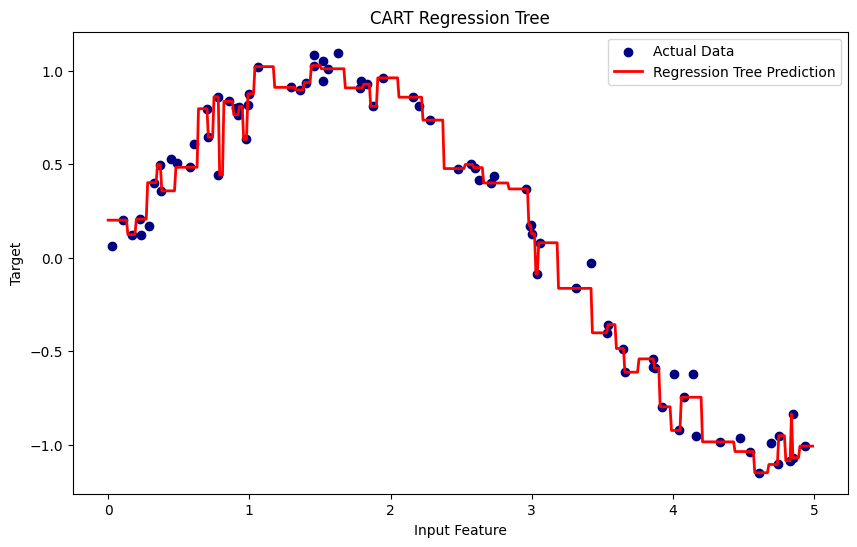

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset for regression
# Here we're using a sine wave dataset with some noise added
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1  # Add some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Decision Tree Regressor (CART for regression)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Visualize the predictions vs the actual values
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual Data", color="navy")
plt.plot(X_plot, y_plot, label="Regression Tree Prediction", color="red", linewidth=2)
plt.xlabel("Input Feature")
plt.ylabel("Target")
plt.title("CART Regression Tree")
plt.legend()
plt.show()


EXP 4 ENSEMBLE LEARNING

Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



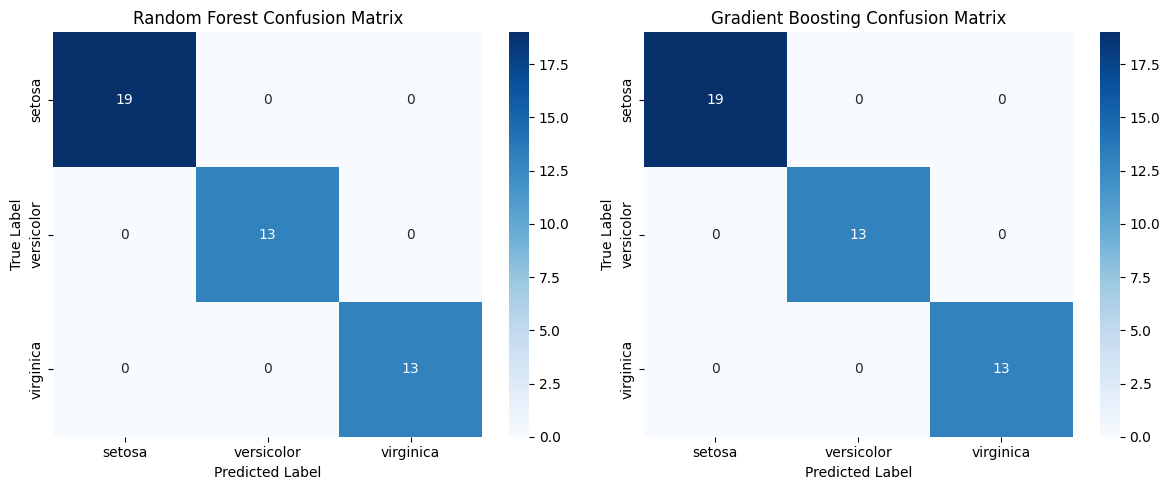

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest and Gradient Boosting models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

# Classification Reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds, target_names=target_names))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds, target_names=target_names))

# Confusion Matrices
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
gb_conf_matrix = confusion_matrix(y_test, gb_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names)
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Gradient Boosting Confusion Matrix
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=target_names, yticklabels=target_names)
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()



EXP 5 GRAPH BASED CLUSTRING

Decision Tree Classifier Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



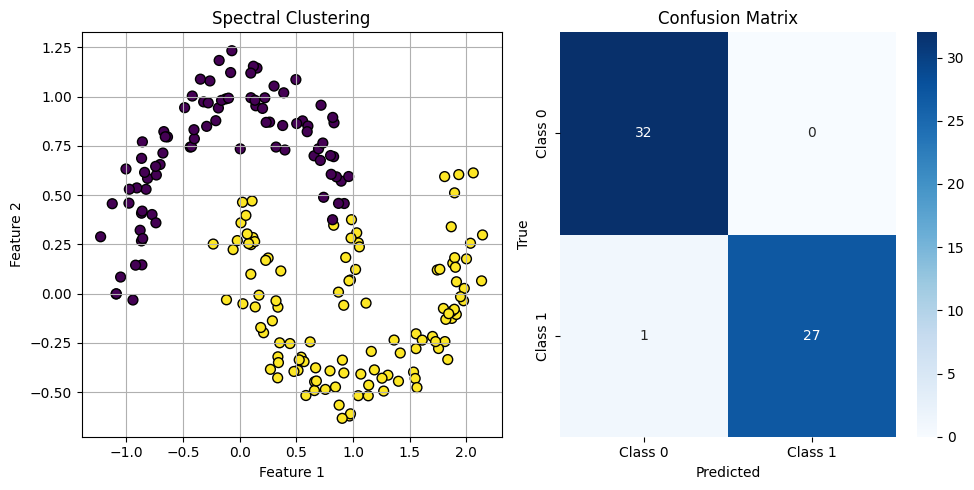

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate synthetic data (two interleaving half circles)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 1: Graph-Based Clustering using Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(X)

# Step 2: Visualize Clustering Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Prepare data for classification
# Here we will use the true labels as our y (for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Classify using a Decision Tree
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Step 4: Evaluate the Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 5: Visualize Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()



EXPERIMENT NO :6 to implement DBscan

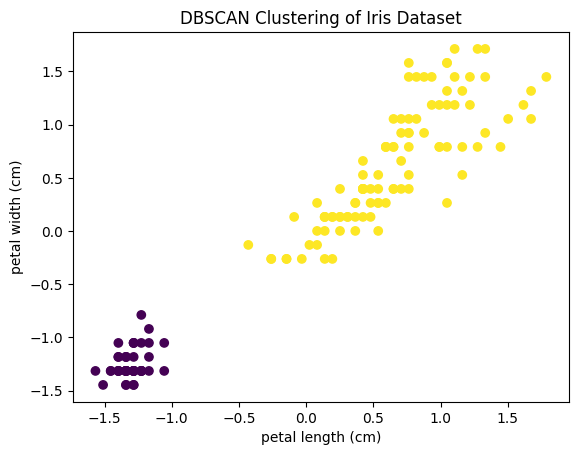

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Consider features 2 and 3 for simplicity

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create a DBSCAN model
dbscan_model = DBSCAN(eps=0.4, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan_model.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()


EXP 7 ( implement PCA)


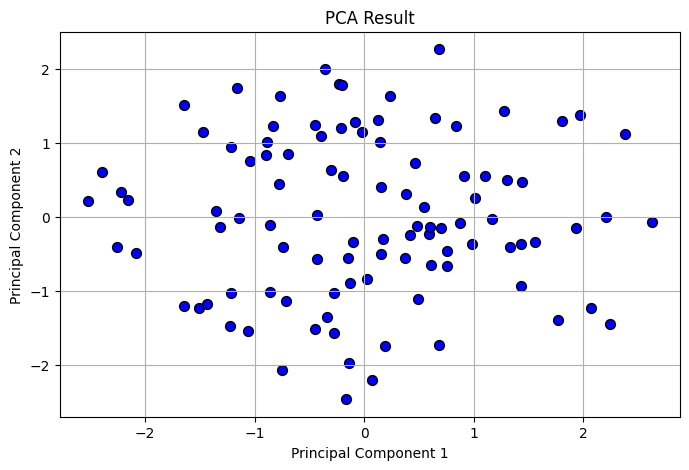

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)

n_samples = 100
n_features = 5

# Create a random dataset with 5 features
X = np.random.rand(n_samples, n_features)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.show()

plt.show()